# MCS 275 Spring 2022 Worksheet 7 Solutions

* Course instructor: David Dumas
* Contributors to this document: Johnny Joyce, Kylash Viswanathan

## Topics

The main topic of this worksheet is **sorting**, and the recursive algorithms for sorting we covered in Lectures 13 and 14.

## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [Lecture 13 - Mergesort](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture13.html)
* [Lecture 14 - Quicksort](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture14.html)
* [Lecture 15 - Comparison sorts](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture15.html)
* [sorts.py](https://github.com/daviddumas/mcs275spring2023/blob/main/samplecode/recursion/sorts.py)
* [sortdemo.ipynb](https://github.com/daviddumas/mcs275spring2023/blob/main/samplecode/recursion/sortdemo.ipynb)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)
* MCS 260 course materials from Fall 2021:
    * [Slides, homework, worksheets, and projects](https://www.dumas.io/teaching/2021/fall/mcs260/)
    * [Sample programs](https://github.com/daviddumas/mcs260fall2021/tree/main/samplecode)

### 1. Merge sorted stacks

Recall that a *stack* is a data structure that mimics a physical stack of items, where the only available operations are to remove the top item ("pop") or add a new item to the top ("push").

In Python, you can simulate a stack using a list by limiting yourself to only calling the methods
* `.pop()` for the stack pop operation, and
* `.append(x)` for the stack push operation
In this way, the end of the list becomes the top of the stack.

In mergesort, the main step was to create a function that can merge two sorted lists.  We made a version of this that uses indexing by integers.  However, the algorithm for merging two sorted lists only ever needs to look at the "next" item from each of the lists, meaning it can also be implemented using stacks.

Make a function `merge_sorted_stacks(A,B,S)` that takes two stacks `A` and `B` whose elements are in sorted order, with the top of each stack being the smallest element, and an initially empty stack `S`.  The function should merge the two stacks into a single reverse-sorted stack `S`.  It can destroy `A` and `B` as it does so.

Remember, `A`, `B`, and `S` will actually be Python list objects.  The only thing that makes them stacks is that you won't use any methods or operations on them except `.pop()` and `.append(x)`.

For example, `merge_sorted_stacks` should function as follows:

In [3]:
# Example with numbers
# A list of numbers is a sorted stack if it is in descending order
# meaning the top of stack (last element of the list) is the smallest.
A = [5,3,1]
B = [6,4,3,2,0]
S = []
merge_sorted_stacks(A,B,S)
S  # will be a reverse sorted stack: top=last element will be largest element

[0, 1, 2, 3, 3, 4, 5, 6]

In [4]:
# Example with strings
# A list of strings is a sorted stack if it is in reverse alphabetical order
# meaning the top of stack (last element of the list) is the earliest in 
# the Python string order
S = []
merge_sorted_stacks(
    ["zebra","kangaroo","aardvark"],
    ["newt","asp"],
    S)
S

['aardvark', 'asp', 'kangaroo', 'newt', 'zebra']

## Solution

In [1]:
def merge_sorted_stacks(A,B,S=[]):
    """Takes two sorted stacks A and B. Returns merged sorted stack."""
    # A_next and B_next should represent the next item to be taken off the stack
    A_next = A.pop()
    B_next = B.pop()
    
    # Take items from A and B until one list is empty
    while True:
        
        if A_next <= B_next:
            S.append(A_next)
            if len(A) == 0: # If there's nothing left in A, stop the loop
                S.append(B_next) # There's still an item from B that we need to append
                break
            else:
                A_next = A.pop()
            
        else:
            S.append(B_next)
            if len(B) == 0:
                S.append(A_next) # There's still an item from A that we need to append
                break
            else:
                B_next = B.pop()
            
    # After the loop has finished, one of the two lists may still have items in it
    # So take all the remaining items and put them in S.
    while len(A) != 0:
        A_next = A.pop()
        S.append(A_next)
    while len(B) != 0:
        B_next = B.pop()
        S.append(B_next)
    
    return S

## 2. Quicksort with other pivot strategies

The quicksort implementation we discussed in lecture uses the last element of the list as a pivot.  Let's explore other options.

Make a new version of `quicksort` that has an optional argument `pivot_strategy` with default value `"last"`.  Implement these other behaviors for the following values:
* `"first"` - Always use the first element as the pivot
* `"middle"` - Use an element as close as possible to the middle of the list as the pivot
* `"random"` - Select the pivot position at random

(Of course, quicksort is always operating on the part of the list between `start` and `end`, so all instances of "first", "last", etc., are understood relative to that part.  For example, "first" means index `start`.)

Test your modified version of quicksort to confirm that it works properly with each strategy.

Don't forget that the `pivot_strategy` argument needs to be propagated to the recursive calls!

# Solution

Below is a modified version of the code from `sorts.py`

In [2]:
def partition(L, start, end, verbose=False, pivot_strategy="last"):
    """
    Partition L[start:end] using the
    last element (L[end-1]) as the pivot.
    Returns the position of the pivot.
    """
    # Choose the index of the pivot
    if pivot_strategy == "last":
        pivot_index = end - 1
    elif pivot_strategy == "first":
        pivot_index = start
    elif pivot_strategy == "middle":
        pivot_index = (start + end) // 2
    elif pivot_strategy == "random":
        pivot_index = random.choice(range(start,end-1))
    
    # Put the pivot at the end
    L[pivot_index], L[end - 1] = L[end - 1], L[pivot_index]

    # Define the pivot. Now the rest of the algorithm can proceed without any changes
    pivot = L[end - 1]
        
    dst = start
    for src in range(start, end):  # challenge Q: Why can't we use range(start,end-1)
        if L[src] < pivot:
            # swap L[src], L[dst]
            L[src], L[dst] = L[dst], L[src]
            dst += 1

    # put the pivot into its final place
    L[end - 1], L[dst] = L[dst], L[end - 1]
    if verbose:
        print("Partitioned into:", L[start:dst], " ", L[dst], " ", L[dst + 1 : end])
    return dst

def quicksort(L, start=0, end=None, verbose=False, pivot_strategy="last"):
    """
    Sort L[start:end] in place using
    quicksort.  Modifies L, returns nothing.
    """
    if end == None:
        # default to end of L
        end = len(L)
    # Are we done yet?!
    if end - start <= 1:
        return
    # Not done yet, need to partition L
    m = partition(L, start, end, verbose, pivot_strategy)
    # m is now the pivot position
    quicksort(L, start, m, verbose, pivot_strategy)  # orange (less than pivot)
    quicksort(L, m + 1, end, verbose, pivot_strategy)  # purple (>= pivot)

## 3. Pathological test data generator

We discussed in class that `quicksort` with last element pivots behaves poorly (quadratic time) on sorted input.  I mentioned that "nearly sorted input" also creates problems.  But the phrase "nearly sorted" is not precise, and could have many interpretations.

Write the following functions to generate lists that are far from randomly ordered, for testing purposes:
* `nearly_sorted1(n,frac=0.1)` - Returns a list of length `n`.  That list should contain consecutive integers, except that `int(frac*n)` of them are replaced with random values chosen from the range `-2*n` to `3*n`.  That is, fraction `frac` of the positions are chosen randomly from a wider range, but the rest are linearly increasing.
* `nearly_sorted2(n)` - Returns a list of length `n`.  The difference between any entry and the one before it is a number randomly chosen from these options: `[-1,0,1,2,3,4,5]`.  Since most of these values are positive, the list "mostly increases" and so could be considered "nearly sorted".  Unlike `nearly_sorted1`, this one doesn't produce lists where an entry is very far from the ones on either side of it.
* `nearly_sorted3(n,k=3)` - Returns a list of length `n` obtained from `list(range(n))` as follows:  First, that list is broken into `k` pieces of similar size.  Then, those pieces are reassembled in a random order.  For example, if `n=10` and `k=2` you might get a return value like `[5,6,7,8,9,0,1,2,3,4]` because pieces `[0,1,2,3,4]` and `[5,6,7,8,9]` were reassembled in the opposite order.  Since the resulting list is likely to have long sublists that are in increasing order, it could be considered "nearly sorted".

## Solution

In [5]:
import random

def nearly_sorted1(n, frac=0.1):
    """Generates list of integers 0 to n-1. Replaces n*frac with random ints"""
    L = list(range(n))
    to_replace = random.sample(L, int(frac*n)) # Randomly choose n*frac items to replace
    for i in to_replace:
        L[i] = random.randint(-2*n, 3*n)
    return L

print(nearly_sorted1(10))

[0, 1, 2, 3, 4, -17, 6, 7, 8, 9]


In [6]:
def nearly_sorted2(n):
    """List of n items starting at 0. Each successive element randomly differs from the
    last by one of: -1,0,1,2,3,4,5"""
    L = [0]
    for i in range(n-1):
        L.append( L[-1] + random.choice((-1,0,1,2,3,4,5)))
    return L

print(nearly_sorted2(10))

[0, 2, 1, 5, 9, 10, 9, 8, 10, 12]


In [7]:
def nearly_sorted3(n, k=3):
    """Takes list with numbers 0 to n-1. Breaks into k pieces, shuffles, then re-assembles"""
    L = list(range(n))
    
    # Choose k-1 indices in ascending order where we'll "split" the list.
    # Don't choose index 0 or -1 because this will result in one of our pieces
    # being empty (i.e. L[0:0] is empty and L[-1:-1] is empty)
    indices = sorted(random.sample(L[1:-1], k-1))
    
    pieces = []
    
    # First piece is from index 0 up to our first randomly-chosen index
    pieces.append(L[:indices[0]])
    
    # Middle pieces
    for i in range(1, k-1):
        pieces.append( L[indices[i-1]:indices[i]] )
        
    # Last piece is from last randomly-chosen index onwards
    pieces.append( L[indices[-1]:])
    
    random.shuffle(pieces)
    print("The list was split into the following pieces:", pieces)
    
    # Put our pieces back into one list
    L = []
    for piece in pieces:
        L.extend(piece)
    return L


print(nearly_sorted3(10, k=3))

The list was split into the following pieces: [[5, 6, 7], [0, 1, 2, 3, 4], [8, 9]]
[5, 6, 7, 0, 1, 2, 3, 4, 8, 9]


## 4. Quicksort stress test

Do timing studies of `quicksort` with different pivot strategies on the types of nearly sorted lists generated in the previous problem, for `n=1000`, `n=10_000`, and `n=100_000`.  Do you see a clear difference relative to a randomly shuffled list?  Is there a difference between the strategies?  Between the types of nearly sorted input?

## Solution

Running the code below in a notebook may result in the Python kernel crashing. If this happens, you can change the recursion limit and try running it again.

The output may be difficult to read, so some plots of the data are shown below. This isn't required in the worksheet, but code has been included that was used to generate the plots using Python's `matplotlib` module.

In [ ]:
import time
import sys
sys.setrecursionlimit(2000) # Edit this line to change maximum number of recursions to whatever you'd like

def timed_quicksort(L, pivot_strategy = "last"):
    """Helper function to run quicksort on a given list and print the time taken"""
    print("Timing quicksort on list of length {} with pivot strategy '{}'".format(len(L), pivot_strategy))
    start = time.time()
    try:
        quicksort(L, pivot_strategy=pivot_strategy)
        end = time.time()
        assert L == sorted(L), "Error: List was not sorted properly" # Make sure the sorting worked
        print("TIME: {:0.4f} seconds".format(end-start)) # 4 Decimal places
        
    # If the test takes too long, print a warning message and continue to the next.
    except RecursionError:
        print("RecursionError: Took more than {} iterations".format(sys.getrecursionlimit()))
        print("Continuing to next test...")
    
    
nearly_sorted_funcs = [nearly_sorted1, nearly_sorted2, nearly_sorted3]
lengths = [1000, 10_000, 100_000]
pivot_strategies = ["last", "first", "middle", "random"]

for func in nearly_sorted_funcs:
    print("Testing function {}".format(func.__name__))
    for length in lengths:
        L = func(length)
        for pivot_strategy in pivot_strategies:
            # Because quicksort operates in-place, we need to make a copy,
            # otherwise the list will already be sorted for the next run
            L_copy = L.copy()
            
            timed_quicksort(L_copy, pivot_strategy)

## Code to generate plots of data (not required)

**Lists of length 1000:**

The results for all pivot methods were roughly similar here. We only start to see bigger differences for lists of length 10,000 (see the next cell).

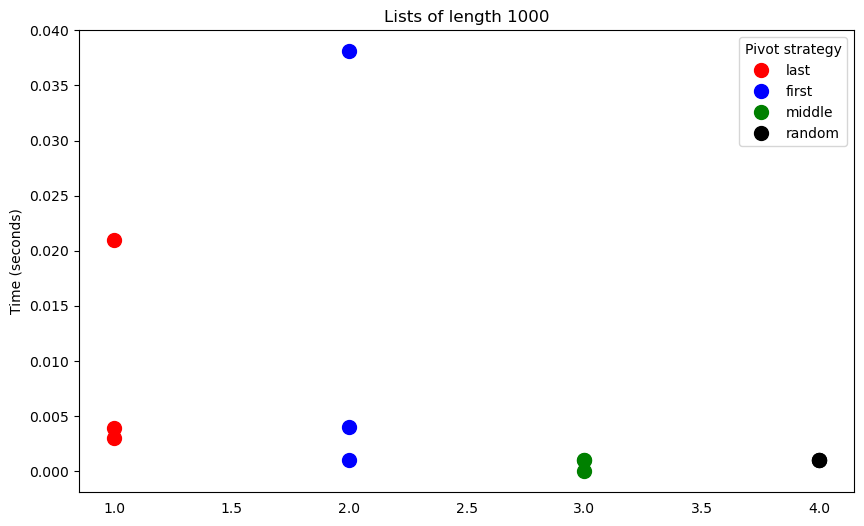

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Code for lists of length 1000. 

# List entries are time taken in seconds for nearly_sorted1 / nearly_sorted2 / nearly_sorted3
last_1000   = [0.003, 0.021, 0.0039]
first_1000  = [0.001, 0.004, 0.0381]
middle_1000 = [0.0,   0.001, 0.001]
random_1000 = [0.001, 0.001, 0.001]

plt.figure(figsize=(10,6))

plt.plot([1,1,1], last_1000, marker="o", linestyle="None", c = "red", label="last", markersize = 10)
plt.plot([2,2,2], first_1000, marker="o", linestyle="None", c = "blue", label="first", markersize = 10)
plt.plot([3,3,3], middle_1000, marker="o", linestyle="None", c = "green", label="middle", markersize = 10)
plt.plot([4,4,4], random_1000, marker="o", linestyle="None", c = "black", label="random", markersize = 10)

plt.tick_params(axis='x',which='both',bottom=False) # Disable ticks on x-axis
plt.title("Lists of length 1000")
plt.ylabel("Time (seconds)")
plt.legend(title="Pivot strategy")

plt.show()

**Lists of length 10,000:**

For pivot methods `"first"` and `"last"`, two out of three tests did not finish.

Using pivot method `middle` gave the best results.

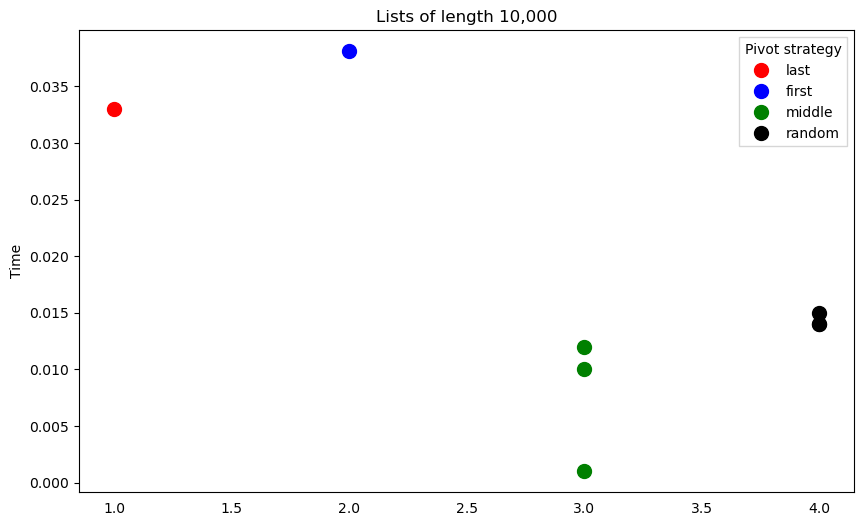

In [22]:
# Code for lists of length 10_000. 

# List entries are time taken in seconds for nearly_sorted1 / nearly_sorted2 / nearly_sorted3
last_10000   = [0.033, np.nan, np.nan] # np.nan means trial did not finish
first_10000  = [0.0381, np.nan, np.nan]
middle_10000 = [0.012, 0.001, 0.01]
random_10000 = [0.015, 0.014, 0.014]

plt.figure(figsize=(10,6))

plt.plot([1,1,1], last_10000, marker="o", linestyle="None", c = "red", label="last", markersize = 10)
plt.plot([2,2,2], first_10000, marker="o", linestyle="None", c = "blue", label="first", markersize = 10)
plt.plot([3,3,3], middle_10000, marker="o", linestyle="None", c = "green", label="middle", markersize = 10)
plt.plot([4,4,4], random_10000, marker="o", linestyle="None", c = "black", label="random", markersize = 10)

plt.title("Lists of length 10,000")

plt.tick_params(axis='x',which='both',bottom=False) # Disable ticks on x-axis
plt.ylabel("Time")
plt.legend(title="Pivot strategy")

plt.show()

**Lists of length 100,000:**

Not included because there were frequent crashes.